## Verify 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Physical constants
h = 6.62607004e-34  # Planck constant
c = 2.99792458e8       # Light speed
k = 1.38064852e-23  # Boltzmann constant
T = 100

In [46]:
# Stregth Collisions and transition probabilities
values = {'OIII':{'Ods':0.58, 'Lds':4363,'Ads':1.6, 'g':3.00,
                  'Ops':0.29, 'Lps':2321, 'Aps':2.3e-1,
                  'Odp1':2.29, 'Ldp1':4959, 'Adp1':6.8e-3,
                  'Odp2':2.29, 'Ldp2':5007, 'Adp2':2.0e-2},
          'NII' :{'Ods':0.83, 'Lds':5755,'Ads':1.0, 'g':3.86,
                  'Ops':0.29, 'Lps':3063, 'Aps':3.3e-2,
                  'Odp1':2.64, 'Ldp1':6548, 'Adp1':9.8e-4,
                  'Odp2':2.64, 'Ldp2':6583, 'Adp2':3.0e-3},
          'SII' :{'Oab':2.76, 'Oag':4.14, 'Obg':7.47,
                  'Aab':8.8e-4, 'Aag':2.6e-4, 'Lab':6731,
                  'Lag':6716},
          'OII' :{'Oab':0.536, 'Oag':0.804, 'Obg':1.17,
                  'Aab':1.6e-4, 'Aag':3.6e-5, 'Lab':3726,
                  'Lag':3729}}

In [63]:
dic = values['NII']
val = values['SII']

In [64]:
#Transition values
Ods,  Lds,  Ads  = dic['Ods'], dic['Lds'], dic['Ads']
Ops,  Lps,  Aps  = dic['Ops'], dic['Lps'], dic['Aps']
Opd1, Lpd1, Adp1 = dic['Odp1'], dic['Ldp1'], dic['Adp1']
Opd2, Lpd2, Adp2 = dic['Odp2'], dic['Ldp2'], dic['Adp2']
Osd,  Lsd,  Asd  = Ods,  Lds,  Ads
Osp,  Lsp,  Asp  = Ops,  Lps,  Aps
Odp1, Ldp1, Apd1 = Opd1, Lpd1, Adp1
Odp2, Ldp2, Apd2 = Opd2, Lpd2, Adp2
Oab, Oag, Obg = val['Oab'], val['Oag'], val['Obg']
Aab, Aag = val['Aab'], val['Aag']
gd, gs = 5, 1
gb, gg = 4, 6
g = dic['g']
V = 8.6e-6
C = V/(T**0.5)

In [65]:
# Exponential function
def E(val,T):
    y = np.exp(-h*c*10**10/(k*T*val))
    return y

In [66]:
# Constant values for 2p2
f1 = gd*Adp2*Lsd/(gs*Asd*Ldp2)
f2 = gs*(Asd+Asp)/(g*V*Ops)
f3 = gs*Asd/(g*V*Opd2)
f4 = gd*Adp2/(g*V*Opd2)
exp = -h*c*10**10/(k*Lsd)
print("f1: {}\nf2: {}\nf3: {}\nf4: {}".format(f1,f2,f3/f2,f4))
print("exp: {}".format(exp))

f1: 0.013113322193528787
f2: 107304.16211342457
f3: 0.10633928833347998
f4: 171.159723515429
exp: -25000.475305433887


In [100]:
# Constant values for 2p3
ff1 = 1+(Obg/Oab)+(Obg/Oag)
ff2 = gb/Oab
ff3 = gg/Oag
print("Constant: {}".format(ff3/ff1))

Constant: 0.2629848783694938


## Equations for $2p^{2}$-like ions

These two equations where found on Osterbrock, Donald 2006

O[III] $$\frac{j_{\lambda 4959}+j_{\lambda 5007}}{j_{\lambda 4363}} = \frac{7.90e^{3.29\times 10^4/T}}{1+4.5\times 10^{-4}N_e/T^{1/2}}$$

N[II] $$\frac{j_{\lambda 6548}+j_{\lambda 6583}}{j_{\lambda 5755}} = \frac{8.23e^{2.50\times 10^4/T}}{1+4.4\times 10^{-3}N_e/T^{1/2}}$$

De acuerdo a las notas de clase

O[III] $$\frac{j_{DP}}{j_{SD}}=0.054e^{32976/T}\frac{\left[ \frac{Ne}{T^{1/2}}+2.44\times 10^5\left( 1+0.1107e^{-32976/T} \right) \right]}  {\frac{Ne}{T^{1/2}} +1692}$$

N[II] $$\frac{j_{DP}}{j_{SD}}=0.013e^{25000/T}\frac{\left[ \frac{Ne}{T^{1/2}}+1.07\times 10^5\left( 1+0.106e^{-25000/T} \right) \right]}  {\frac{Ne}{T^{1/2}} +171}$$

In [42]:
def ratio_book_OIII(Ne,T):
    up = 7.9*np.exp(3.29e4/T)
    down = 1+4.5e-4*Ne/(T**0.5)
    return up/down

def ratio_book_NII(Ne,T):
    up = 8.23*np.exp(2.50e4/T)
    down = 1+4.4e-3*Ne/(T**0.5)
    return up/down

### Complete Equation
Equation with no Taylor series expansion

In [43]:
def ratio_normal(Ne,T):
    f1 = gd*Adp2*Lsd/(gs*Asd*Ldp2)
    f2 = gs*(Asd+Asp)/(g*V*Ops)
    f3 = gs*Asd/(g*V*Opd2)
    f4 = gd*Adp2/(g*V*Opd2)
    
    fac = f1*E(-Lsd,T)
    up = Ne/(T**0.5) + f2*(1+(f3/f2)*E(Lsd,T)) + \
        Ne/(g*T**0.5)*(Osd/Opd2)*E(Lsd,T)
    down = Ne/(T**0.5) + f4 + \
        Ne*Ods/(g*Opd2)*E(Lds,T)*E(Ldp2,T)*E(-Lps,T)
    return fac*up/down

### Approximated equation

In [44]:
def ratio_approx(Ne,T):
    f1 = gd*Adp2*Lsd/(gs*Asd*Ldp2)
    f2 = gs*(Asd+Asp)/(g*V*Ops)
    f3 = gs*Asd/(g*V*Opd2)
    f4 = gd*Adp2/(g*V*Opd2)
    fac = f1*E(-Lsd,T)
    up = Ne/(T**0.5)+f2*(1+(f3/f2)*E(Lsd,T))
    down = Ne/(T**0.5) + f4
    return fac*up/down

### Plots

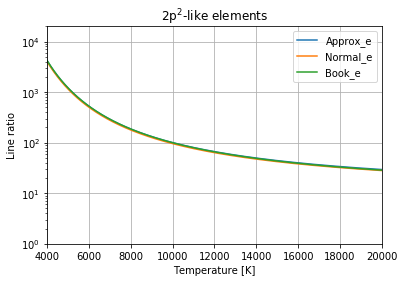

In [45]:
T = np.linspace(1000,20000,1000000)
plt.title('2p$^{2}$-like elements')
plt.xlim(4000,20000)
plt.ylim(1,2e4)
plt.semilogy(T,ratio_approx(Ne=100,T=T),label='Approx_e')
plt.semilogy(T,ratio_normal(Ne=100,T=T),label='Normal_e')
plt.semilogy(T,ratio_book_NII(Ne=100,T=T),label='Book_e')
plt.xlabel('Temperature [K]')
plt.ylabel('Line ratio')
plt.legend()
plt.grid()

## Equations for $2p^{3}$-like ions

S[II] $$\frac{j_{6716}}{j_{6731}}=\frac{3A_{6716}}{2A_{6731}}\left( \frac{N_e C+0.26A_{6731}}{N_e C+0.26A_{6716}} \right)$$

O[II] $$\frac{j_{3726}}{j_{3729}}=\frac{3A_{3726}}{2A_{3729}}\left( \frac{N_e C+1.60A_{3729}}{N_e C+1.60A_{3726}} \right)$$

In [91]:
def ratio(Ne,T,ion='OII'):
    
    val = values[ion]
    V = 8.6e-6
    C = V/(T**0.5)
    Oab, Oag, Obg = val['Oab'], val['Oag'], val['Obg']
    Aab, Aag = val['Aab'], val['Aag']
    Lab, Lag = val['Lab'], val['Lag']

    ff1 = 1+(Obg/Oab)+(Obg/Oag)
    ff2 = gb/Oab
    ff3 = gg/Oag
    ff3/ff1
    
    up = gg*Aag*Lab*(Ne*C+(ff3/ff1)*Aab)
    down = gb*Aab*Lag*(Ne*C+(ff3/ff1)*Aag)

    return up/down

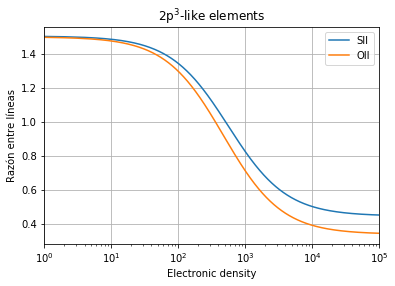

In [106]:
Ne = np.linspace(1,1e6,1000000)
plt.title('2p$^{3}$-like elements')
plt.xlim(1,1e5)
plt.semilogx(Ne,ratio(Ne=Ne,T=5000,ion='SII'),label='SII')
plt.semilogx(Ne,ratio(Ne=Ne,T=5000,ion='OII'),label='OII')
plt.xlabel('Electronic density')
plt.ylabel('Razón entre líneas')
plt.legend()
plt.grid()